In [12]:
import sys,os
home = '/home/anibal/'
sys.path.append(home + '/roman_rubin')
from functions_roman_rubin import fit_rubin_roman
from roman_rubin import read_data
from roman_rubin import sim_event

import numpy as np
import matplotlib.pyplot as plt
#pyLIMA
from pyLIMA import event
from pyLIMA import telescopes
from pyLIMA.toolbox import time_series
from pyLIMA.simulations import simulator
from pyLIMA.models import PSBL_model
from pyLIMA.models import USBL_model
from pyLIMA.models import FSPLarge_model
from pyLIMA.models import PSPL_model
from pyLIMA.fits import TRF_fit
from pyLIMA.fits import DE_fit
from pyLIMA.fits import MCMC_fit
from pyLIMA.outputs import pyLIMA_plots
from pyLIMA.outputs import file_outputs
from pyLIMA.fits import LM_fit

import multiprocessing as mul
import pandas as pd

In [3]:
#2329 example, microlensing channel

In [4]:
source = 5126#6187
nset = int(9116/5000)
print(source-nset*5000)
path_event = path+f'set_sim{nset}/Event_{source-nset*5000}.h5'
# path_event = path+f'set_sim{1}/Event_{2329}.h5' 
data, params, bands = read_data(path_event)
# print([(key, params[key]) for key in params if not 'f' in key ])
data_fit = np.load(path+f'set_fit{nset}/Event_RR_{source-nset*5000}_TRF.npy',allow_pickle=True).item()

print(data_fit['best_model'][4:6])

print(np.sqrt(np.diag(data_fit['covariance_matrix']))[4:6])
print(np.sqrt(np.diag(data_fit['covariance_matrix']))[4:6]/data_fit['best_model'][4:6])

126
[6.654129708749486e-05, 1413.2572621014976]
[4.68080780e-02 4.28110552e+02]
[7.03444027e+02 3.02924714e-01]


In [5]:
# print(params['te'])

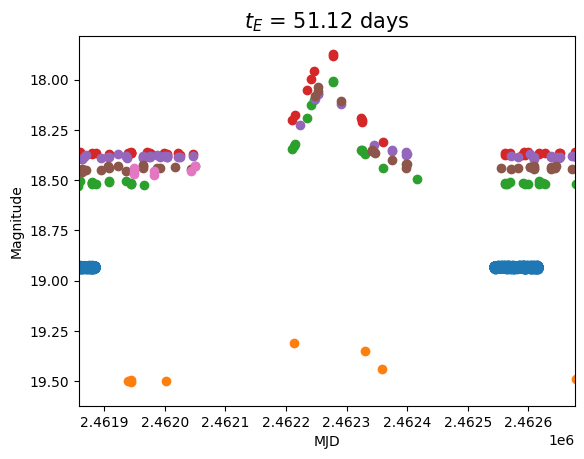

In [6]:
plt.close('all')
for b in bands:
    plt.errorbar(bands[b]['time'],bands[b]['mag'],bands[b]['err_mag'],marker='o',ls='')
plt.gca().invert_yaxis()
plt.xlabel('MJD')
plt.ylabel('Magnitude')
plt.xlim(params['t0']-8*params['tE'],params['t0']+8*params['tE'])
plt.title(r'$t_E$ = '+f"{round(params['tE'],2)} days",fontsize=15)
plt.show()

In [8]:
# np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T

In [9]:
source-int((source/5000))*5000

126

In [13]:
params['te']=params['tE']

# params['s']=params['separation']
# params['q']=params['mass_ratio']


f = 'W149'
wfirst_lc = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f = 'u'
lsst_u = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f = 'g'
lsst_g = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f = 'r'
lsst_r = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f = 'i'
lsst_i = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f = 'z'
lsst_z = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f = 'y'
lsst_y = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T

Source = 4097
path_save = '/home/anibal/test _events/'
path_ephemerides = '/home/anibal/files_db/james_webb.txt'
model = 'PSPL'
algo = 'TRF'
Origin = "True"

# fit_2, e, pyLIMAmodel = fit_rubin_roman(4097, params, '/home/anibal/',path_ephemerides,'PSPL','MCMC','origin',
#                wfirst_lc, lsst_u, lsst_g, lsst_r, lsst_i, lsst_z, lsst_y)

fit_2, e, pyLIMAmodel = fit_rubin_roman(Source, params, path_save, path_ephemerides, model, algo, Origin, wfirst_lc, lsst_u, lsst_g,
                    lsst_r, lsst_i, lsst_z,
                    lsst_y)

check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 20736 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 20736 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: Er

Parallax(Full) estimated for the telescope Roman: SUCCESS
Parallax(Full) estimated for the telescope u: SUCCESS
Parallax(Full) estimated for the telescope g: SUCCESS
Parallax(Full) estimated for the telescope r: SUCCESS
Parallax(Full) estimated for the telescope i: SUCCESS
Parallax(Full) estimated for the telescope z: SUCCESS
Parallax(Full) estimated for the telescope y: SUCCESS


/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 12 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 96 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 96 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 96 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWa

initial_guess  : Initial parameters guess SUCCESS
Using guess:  [2462267.592516269, 0.698069137844791, 51.120377675817146, 0.0012981684951651, 0.0001330825935508, 2200.069316589641, 1217.844681619389, 1330.5636207098748, 723.4457657779798, 3306.02462003561, 1787.368915601953, 3669.5157533170027, 2048.2111236120136, 2285.0271606899732, 2021.3855966681947, 2834.9233815415846, 1920.6385591238281, 1874.7555506159724, 1874.7555506159724]
fit  : Trust Region Reflective fit SUCCESS
best_model: [2462267.2574116755, 0.5765428514923566, 57.49951408179689, 2.978557774351787e-10, 1.2264533417422165e-10, 1413.3467804104055, 2434.900409331972, 962.9315487000781, 1445.693808393119, 2407.5348489184466, 3573.401521526364, 2672.599688094082, 4094.7072294818663, 1664.039777347386, 4040.1903820331145, 2059.213406602989, 3837.7355301045473, 3749.5111012319444, 3749.5111012319444] chi2 42745.63540082885


In [ ]:
# fit_2.fit_results
# plt.close('all')
# plt.plot(fit_2.fit_results['MCMC_chains'][:,:,5])
# plt.show()

In [ ]:
# params['piEE']

In [16]:
fit_2.fit_results['best_model'][3:5]



[2.978557774351787e-10, 1.2264533417422165e-10]

In [15]:
print(fit_2.fit_results['best_model'][3:5])
print(np.sqrt(np.diag(fit_2.fit_results['covariance_matrix']))[3:5])
print(np.sqrt(np.diag(fit_2.fit_results['covariance_matrix']))[3:5]/fit_2.fit_results['best_model'][3:5])

[2.978557774351787e-10, 1.2264533417422165e-10]
[0.10431496 0.04683893]
[3.50219712e+08 3.81905481e+08]


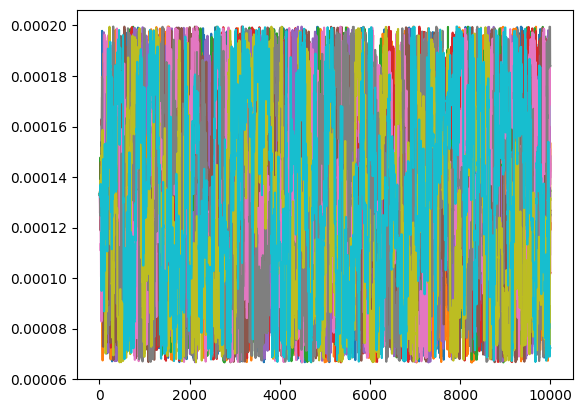

In [53]:
plt.close('all')
plt.plot(fit_2.fit_results['MCMC_chains'][:,:,4])
plt.show()

In [1]:
MCMC_results = fit_2.fit_results['MCMC_chains']
print ('Parameters', '   Model','        Fit','    Errors')
print ('-----------------------------------')
print ('t_0:', f"        {round(params['t0'],4)} ",str(np.median(MCMC_results[1000:,:,0]))[:7],'',str(np.std(MCMC_results[1000:,:,0]))[:7])
print ('u_0:', f"        {round(params['u0'],10)} ",str(np.median(MCMC_results[1000:,:,1]))[:7],'',str(np.std(MCMC_results[1000:,:,1]))[:7])
print ('t_E:', f"        {round(params['tE'],9)} ",str(np.median(MCMC_results[1000:,:,2]))[:7],'',str(np.std(MCMC_results[1000:,:,2]))[:7])
# print ('rho:', f"        {round(params['rho'],10)} ",str(np.median(MCMC_results[1000:,:,3]))[:7],'',str(np.std(MCMC_results[1000:,:,3]))[:7])
print ('piEN:', f"       {round(params['piEE'],10)} ",str(np.median(MCMC_results[1000:,:,3]))[:7],'',str(np.std(MCMC_results[1000:,:,3]))[:7])
print ('piEE:', f"       {round(params['piEN'],9)}  ",str(np.median(MCMC_results[1000:,:,4]))[:7],' ',str(np.std(MCMC_results[1000:,:,4]))[:7])

NameError: name 'fit_2' is not defined

In [ ]:
from astropy.time import Time
path_dataslice = '/home/anibal/roman_rubin/simulation/dataSlice_baseline.npy'
dataSlice = np.load(path_dataslice, allow_pickle=True)
dataSlice = dataSlice[['observationStartMJD','fiveSigmaDepth','filter']]

filters = ['u','g','r','i','z','y']
time = []

for fil in filters:
    
    for i in range(len(dataSlice['fiveSigmaDepth'][np.where(dataSlice['filter'] == fil)])):
        m5 = dataSlice['fiveSigmaDepth'][np.where(dataSlice['filter'] == fil)][i]
        mjd = dataSlice['observationStartMJD'][np.where(dataSlice['filter'] == fil)][i]
        time.append(mjd)

nominal_seasons = [
        {'start': '2027-02-11T00:00:00', 'end': '2027-04-24T00:00:00'},
        {'start': '2027-08-16T00:00:00', 'end': '2027-10-27T00:00:00'},
        {'start': '2028-02-11T00:00:00', 'end': '2028-04-24T00:00:00'},
        {'start': '2030-02-11T00:00:00', 'end': '2030-04-24T00:00:00'},
        {'start': '2030-08-16T00:00:00', 'end': '2030-10-27T00:00:00'},
        {'start': '2031-02-11T00:00:00', 'end': '2031-04-24T00:00:00'},]

news_ts = []
for i in range(len(nominal_seasons)):
    tstart,tend = Time(nominal_seasons[i]['start'], format='isot').mjd,Time(nominal_seasons[i]['end'], format='isot').mjd
    add_obs = np.arange(tstart, tend, 1)
    news_ts += list(add_obs)
    
news_m5 = np.ones(len(news_ts))*np.mean(dataSlice['fiveSigmaDepth'][np.where(dataSlice['filter'] == 'r')])

fil = 'r'

new_ts = np.concatenate((dataSlice['observationStartMJD'][np.where(dataSlice['filter'] == fil)],np.array(news_ts)))
new_m5 = np.concatenate((dataSlice['fiveSigmaDepth'][np.where(dataSlice['filter'] == fil)],np.array(news_m5)))

new_observationStartMJD = new_ts#[62594.29098117, 62594.29098118, 62594.29098119]
new_fiveSigmaDepth = new_m5#[23.64142450, 23.64142451, 23.64142452]
new_filter = ['r']*len(new_m5)

# Find the index where filter is 'r'
index_to_replace = np.where(dataSlice['filter'] == 'r')[0]

# Remove the original 'r' entry
dataSlice = np.delete(dataSlice, index_to_replace)

# Create new records to insert
new_data = np.rec.array([
    (new_observationStartMJD[i], new_fiveSigmaDepth[i], new_filter[i])
    for i in range(len(new_observationStartMJD))
], dtype=dataSlice.dtype)

# Combine original data with new data
combined_data = np.hstack((dataSlice, new_data))

np.save('/home/anibal/roman_rubin/dataSlice_custom.npy',combined_data)

In [ ]:

i=source-int((source/5000))*5000
data = pd.read_csv('/home/anibal/results_roman_rubin/FFP_uni_split_1.csv').iloc[i]
path_ephemerides = '/home/anibal/files_db/james_webb.txt'
path_dataslice = '/home/anibal/roman_rubin/dataSlice_custom.npy'
model = 'FSPL'
my_own_model, pyLIMA_parameters, all_residuals, decision = sim_event(i, data, path_ephemerides, path_dataslice, model)

In [ ]:
for j in range(len(my_own_model.event.telescopes)):
    mjd = my_own_model.event.telescopes[j].lightcurve_magnitude['time']
    mag = my_own_model.event.telescopes[j].lightcurve_magnitude['mag']
    err_mag = my_own_model.event.telescopes[j].lightcurve_magnitude['err_mag']
    plt.errorbar(mjd,mag,err_mag,marker='o',ls='')
plt.gca().invert_yaxis()

In [12]:
bands = {}
for tel in my_own_model.event.telescopes:
    bands[tel.name]=tel.lightcurve_magnitude

event_params = pyLIMA_parameters
event_params['te']=pyLIMA_parameters['tE']
# event_params['s']=pyLIMA_parameters['separation']
# event_params['q']=pyLIMA_parameters['mass_ratio']
# print(pyLIMA_parameters)
lc_to_fit = {}
for telo in bands:
    if not len(bands[telo]['mag'])==0:
        lc_to_fit[telo] = np.array([bands[telo]['time'], bands[telo]['mag'], bands[telo]['err_mag']]).T
    else:
        lc_to_fit[telo] = []

origin=''
model="FSPL"
algo="TRF"
path_to_save_fit = '/home/anibal/'

fit_rr, event_fit_rr, pyLIMAmodel_rr = fit_rubin_roman(i,event_params, path_to_save_fit, path_ephemerides, model,algo,origin,
                           lc_to_fit["W149"], lc_to_fit["u"], lc_to_fit["g"], lc_to_fit["r"],
                                       lc_to_fit["i"], lc_to_fit["z"],lc_to_fit["y"])

fit_roman, event_fit_roman, pyLIMAmodel_roman = fit_rubin_roman(i,event_params, path_to_save_fit, path_ephemerides,model,algo,origin,
                           lc_to_fit["W149"], [], [], [], [], [],[])

check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 20736 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 20736 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


Parallax(Full) estimated for the telescope Roman: SUCCESS
Parallax(Full) estimated for the telescope u: SUCCESS
Parallax(Full) estimated for the telescope g: SUCCESS
Parallax(Full) estimated for the telescope r: SUCCESS
Parallax(Full) estimated for the telescope i: SUCCESS
Parallax(Full) estimated for the telescope z: SUCCESS
Parallax(Full) estimated for the telescope y: SUCCESS


/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 12 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 12 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarn

initial_guess  : Initial parameters guess SUCCESS
Using guess:  [2462605.447156264, 0.7462790399864926, 29.668552976399567, 0.0071237314954346, 0.0011241603215129, -2.656644023102882e-05, 1658.7635645568848, 1558.1921303309455, 1100.7362438711677, 660.093000917409, 2911.8738224927215, 1715.5286771555964, 2492.6312212811326, 2230.0167634303575, 3408.6653911556846, 2334.9238537347796, 3500.5949391177564, 2286.4446992970534, 2260.444379851348, 2260.444379851348]
fit  : Trust Region Reflective fit SUCCESS
best_model: [2462605.457166803, 0.7525117240057315, 29.530576502653382, 0.010158769283414366, 0.000564757661593258, -1.3292389328013151e-05, 1683.6372066136262, 3113.7598014509663, 1118.1103002716686, 1317.5173095776768, 2954.4237071788793, 3429.0546603132334, 2529.919419509169, 4454.643981305524, 3459.7611495946394, 4666.656497979505, 3553.2903425569893, 4566.967089542932, 4520.8887597024, 4516.403425005329] chi2 42656.829124028736
check_event  : Everything looks fine...
Parallax(Full) e

In [13]:
print('sigma/fit(Roman) = ',np.sqrt(np.diag(fit_roman.fit_results['covariance_matrix']))[4:6]/fit_roman.fit_results['best_model'][4:6])
print('sigma/fit(Roman-Rubin) = ',np.sqrt(np.diag(fit_rr.fit_results['covariance_matrix']))[4:6]/fit_rr.fit_results['best_model'][4:6])

sigma/fit(Roman) =  [  245.9188356  -2542.49969347]
sigma/fit(Roman-Rubin) =  [  218.53022742 -2168.46324892]


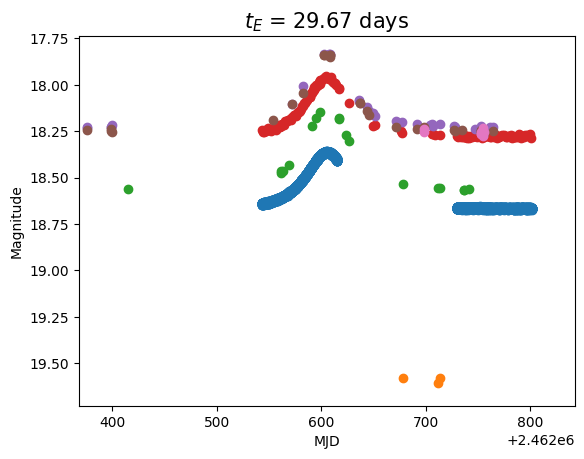

In [14]:
plt.close('all')
for b in bands:
    plt.errorbar(bands[b]['time'], bands[b]['mag'], bands[b]['err_mag'],marker='o',ls='')

plt.gca().invert_yaxis()
plt.xlabel('MJD')
plt.ylabel('Magnitude')
plt.xlim(event_params['t0']-8*event_params['tE'],event_params['t0']+8*event_params['tE'])
plt.title(r'$t_E$ = '+f"{round(event_params['tE'],2)} days",fontsize=15)
plt.show()

In [96]:
def model_rubin_roman(Source,true_model,event_params, path_ephemerides,model, wfirst_lc, lsst_u, lsst_g, lsst_r, lsst_i, lsst_z,
                    lsst_y):
    '''
    Perform fit for Rubin and Roman data for fspl, usbl and pspl
    '''
    
    tlsst = 60350.38482057137 + 2400000.5
    RA, DEC = 267.92497054815516, -29.152232510353276
    e = event.Event(ra=RA, dec=DEC)

    if len(lsst_u) + len(lsst_g) + len(lsst_r) + len(lsst_i) + len(lsst_z) + len(lsst_y) == 0:
        e.name = 'Event_Roman_' + str(int(Source))
    else:
        e.name = 'Event_RR_' + str(int(Source))
    tel_list = []

    # Add a PyLIMA telescope object to the event with the Gaia lightcurve
    tel1 = telescopes.Telescope(name='Roman', camera_filter='W149',
                                light_curve=wfirst_lc,
                                light_curve_names=['time', 'mag', 'err_mag'],
                                light_curve_units=['JD', 'mag', 'mag'],
                                location='Space')

    ephemerides = np.loadtxt(path_ephemerides)
    ephemerides[:, 0] = ephemerides[:, 0]
    ephemerides[:, 3] *= 60 * 300000 / 150000000
    deltaT = tlsst - ephemerides[:, 0][0]
    ephemerides[:, 0] = ephemerides[:, 0] + deltaT
    tel1.spacecraft_positions = {'astrometry': [], 'photometry': ephemerides}
    e.telescopes.append(tel1)
    tel_list.append('Roman')
    
    lsst_lc_list = [lsst_u,lsst_g,lsst_r,lsst_i,lsst_z,lsst_y]
    lsst_bands = "ugrizy"
    for j in range(len(lsst_lc_list)):
        if not len(lsst_lc_list[j])==0:
            tel = telescopes.Telescope(name=lsst_bands[j], camera_filter=lsst_bands[j],
                                light_curve=lsst_lc_list[j],
                                light_curve_names=['time', 'mag', 'err_mag'],
                                light_curve_units=['JD', 'mag', 'mag'],
                                location='Earth')
            e.telescopes.append(tel)
            tel_list.append(lsst_bands[j])
    e.check_event()
    # Give the model initial guess values somewhere near their actual values so that the fit doesn't take all day
    t0 = float(event_params['t_center'])
    # u0 = float(event_params['u_center'])
    
    # rango = 0.5
    if model == 'FSPL':
        pyLIMAmodel = FSPLarge_model.FSPLargemodel(e, parallax=['Full', t0])
    elif model=='USBL':
        if true_model:
            pyLIMAmodel = USBL_model.USBLmodel(e, origin=['third_caustic', [0, 0]],
                                               blend_flux_parameter='ftotal',
                                               parallax=['Full', t0])
        else:
            pyLIMAmodel = USBL_model.USBLmodel(e, blend_flux_parameter='ftotal', parallax=['Full', t0])
    elif model=='PSPL':
        pyLIMAmodel = PSPL_model.PSPLmodel(e, parallax=['Full', t0])
    return pyLIMAmodel



In [ ]:
# model_rubin_roman(1,true_model,params, path_ephemerides,'FSPL', wfirst_lc, lsst_u, lsst_g, lsst_r, lsst_i, lsst_z,
#                     lsst_y)
# pyLIMA_plots.plot_lightcurve

In [20]:
ZP = {'W149':27.615, 'u':27.03, 'g':28.38, 'r':28.16,
          'i':27.85, 'z':27.46, 'y':26.68}
colorbands={'W149':'b', 'u':'purple', 'g':'g', 'r':'red',
          'i':'yellow', 'z':'k', 'y':'cyan'}



i=18#34 cat B #18 good
nset=1
path_event = f'/home/anibal/results_roman_rubin/PB_new_format2/PB/set_sim{nset}/Event_{i}.h5'
path_fit_rr = f'/home/anibal/results_roman_rubin/PB_new_format2/PB/set_fit{nset}/Event_RR_{i}_TRF.npy'
path_fit_roman = f'/home/anibal/results_roman_rubin/PB_new_format2/PB/set_fit{nset}/Event_Roman_{i}_TRF.npy'
path_TRILEGAL = f"/home/anibal/results_roman_rubin/PB_planet_split_{nset}.csv"
model_ulens = 'USBL'

path_ephemerides = '/home/anibal/files_db/james_webb.txt'
path_dataslice = '/home/anibal/roman_rubin/simulation/dataSlice_baseline.npy'

info_dataset, pyLIMA_parameters, bands = read_data(path_event)


In [22]:
print(data_fit_rr['best_model'])
print(data_fit_roman['best_model'])
info_dataset, pyLIMA_parameters, bands = read_data(path_event)
print(pyLIMA_parameters)
ulens_params = []
for b in (['t_center','u_center','tE','rho','separation','mass_ratio','alpha','piEN','piEE']):
    ulens_params.append(pyLIMA_parameters[b])
flux_params = []
for b in bands:
    if not len(bands[b])==0:
        zp_Rubin_to_pyLIMA = (10**((-27.4+ZP[b])/2.5))
        
        flux_params.append(pyLIMA_parameters['fsource_'+b]/zp_Rubin_to_pyLIMA)
        flux_params.append(pyLIMA_parameters['ftotal_'+b]/zp_Rubin_to_pyLIMA)
        
true_params = ulens_params+flux_params

[2462548.4311434114, 0.24178308181511007, 411.5371832043354, 0.00013306165013805257, 1.4735254955104218, 0.0005763122573780733, 1.9492773322803527, 0.002942911339786751, -0.016007646528998963, 196.55018915366944, 427.8090621484041, 36.83855975909406, 86.54068926385905, 148.12112732882792, 221.6888467368195, 132.8499464265388, 320.59231237663647, 167.77100325899025, 380.10650123594917, 191.31437631643104, 415.87847121592677]
[2462555.128508934, 0.3077279268353271, 347.33813350209715, 9.399248799673462e-05, 1.148484418661477, 0.0005630073419371968, 2.1715068481629105, 0.006047778324183864, -0.03275948700649676, 266.2962157544676, 429.46571814574395]
{'alpha': 2.170221123244217, 'fblend_W149': 206.28179213395828, 'fblend_g': 100.45169468197552, 'fblend_i': 223.6983332752606, 'fblend_r': 69.10845649953637, 'fblend_u': 2.493525365117888, 'fblend_y': 87.62721758298721, 'fblend_z': 173.00884416162543, 'fsource_W149': 317.17398829050336, 'fsource_g': 114.33135273107756, 'fsource_i': 262.484925

In [23]:

Source = 18
event_params = pyLIMA_parameters
event_params['te']=event_params['tE']
event_params['s']=event_params['separation']
event_params['q']=event_params['mass_ratio']

f= 'W149'
wfirst_lc = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f = 'u'
lsst_u = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f='g'
lsst_g = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f='r'
lsst_r = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f='i'
lsst_i = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f='z'
lsst_z = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f='z'
lsst_y = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T

model_true = model_rubin_roman(Source,True,event_params, path_ephemerides,model_ulens, wfirst_lc, lsst_u, lsst_g, lsst_r, lsst_i, lsst_z,
                    lsst_y)

# {'t_center':data_fit_rr['best_model'][0]}
model_rr = model_rubin_roman(Source,False,event_params, path_ephemerides,model_ulens, wfirst_lc, lsst_u, lsst_g, lsst_r, lsst_i, lsst_z,
                    lsst_y)
# {'t_center':data_fit_roman['best_model'][0]}
model_roman = model_rubin_roman(Source,False,event_params, path_ephemerides,model_ulens, wfirst_lc, [], [], [], [], [],[])


check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 20736 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 20736 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: Er

Parallax(Full) estimated for the telescope Roman: SUCCESS


/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 96 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 86 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 86 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 86 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWa

Parallax(Full) estimated for the telescope g: SUCCESS
Parallax(Full) estimated for the telescope r: SUCCESS
Parallax(Full) estimated for the telescope i: SUCCESS
Parallax(Full) estimated for the telescope z: SUCCESS
Parallax(Full) estimated for the telescope y: SUCCESS
check_event  : Everything looks fine...
Parallax(Full) estimated for the telescope Roman: SUCCESS
Parallax(Full) estimated for the telescope g: SUCCESS
Parallax(Full) estimated for the telescope r: SUCCESS
Parallax(Full) estimated for the telescope i: SUCCESS
Parallax(Full) estimated for the telescope z: SUCCESS
Parallax(Full) estimated for the telescope y: SUCCESS
check_event  : Everything looks fine...
Parallax(Full) estimated for the telescope Roman: SUCCESS


Parallax(Full) estimated for the telescope Roman: SUCCESS
Parallax(Full) estimated for the telescope Roman: SUCCESS
Parallax(Full) estimated for the telescope g: SUCCESS


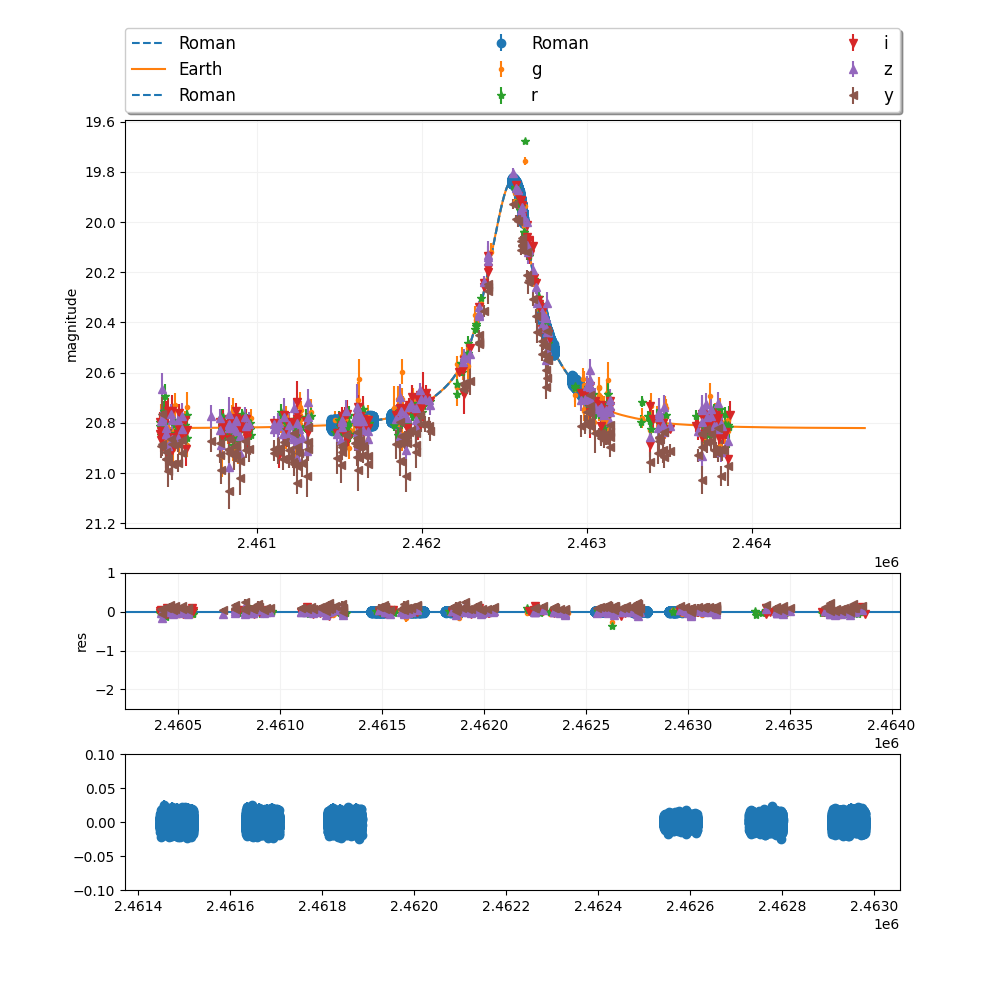

In [27]:
from pyLIMA.outputs import pyLIMA_plots
from cycler import cycler
%matplotlib widget
plt.close('all')
# custom_cycler = (cycler(color=custom_color))

# pyLIMA_plots.MARKERS_COLORS = custom_cycler
# pyLIMA_plots.MARKER_SYMBOLS = np.array([custom_marker])
### Find the telescope fluxes if needed

if len(data_fit_rr['best_model']) != len(model_rr.model_dictionnary):
    telescopes_fluxes = model_rr.find_telescopes_fluxes(data_fit_rr['best_model'])
    telescopes_fluxes = [getattr(telescopes_fluxes, key) for key in
                         telescopes_fluxes._fields]
    model_parameters1 = np.r_[data_fit_rr['best_model'], telescopes_fluxes]
else:
    model_parameters1 = data_fit_rr['best_model']

    
if len(data_fit_roman['best_model']) != len(model_roman.model_dictionnary):
    telescopes_fluxes = model_roman.find_telescopes_fluxes(data_fit_roman['best_model'])
    telescopes_fluxes = [getattr(telescopes_fluxes, key) for key in
                         telescopes_fluxes._fields]
    model_parameters2 = np.r_[data_fit_rr['best_model'], telescopes_fluxes]
else:
    model_parameters2 = data_fit_rr['best_model']
    
if len(true_params) != len(model_true.model_dictionnary):
    telescopes_fluxes = model_true.find_telescopes_fluxes(true_params)
    telescopes_fluxes = [getattr(telescopes_fluxes, key) for key in
                         telescopes_fluxes._fields]
    model_parameters3 = np.r_[true_params, telescopes_fluxes]
else:
    model_parameters3 = true_params

# tmin, tmax = 2460200., data_ogle[-1,0]+5.
# tmin, tmax = 2460160., data_ogle[-1,0]+20.
fig, axes = plt.subplots(3, 1,figsize=(10,10), height_ratios=[3, 1,1])

# Lc plot
axes[0].title.set_text('name')
axes[0].set_ylabel("magnitude") 
axes[0].grid(True, color='0.95')
axes[0].invert_yaxis()
# axes[0].set_xlim(tmin, tmax)
# axes[0].set_ylim(18.5, 12.5) 
# axes[0].set_ylim(17.5, 12.5) 

#Plot model1 and align data to it
pyLIMA_plots.plot_photometric_models(axes[0], model_rr, model_parameters1, plot_unit='Mag')
pyLIMA_plots.plot_photometric_models(axes[0], model_roman, model_parameters2, plot_unit='Mag')
# pyLIMA_plots.plot_photometric_models(axes[0], model_true, model_parameters3, plot_unit='Mag')
pyLIMA_plots.plot_aligned_data(axes[0], model_rr, model_parameters1, plot_unit='Mag')

colors = ['darkslategray', 'gray', 'lightgray']

# for i in range(len(spec_jds)):
#     axes[0].axvline(x=spec_jds[i], label='Spec_'+str(i), ls='--', color=colors[i])

# plot residuals
axes[1].set_ylabel("res") 
axes[1].grid(True, color='0.95')

pyLIMA_plots.plot_residuals(axes[1], model_rr, data_fit_rr['best_model'], plot_unit='Mag')
pyLIMA_plots.plot_residuals(axes[2], model_roman, data_fit_roman['best_model'], plot_unit='Mag')
# axes[1].set_xlim(tmin, tmax)
axes[1].set_ylim(-2.5, 1)
axes[1].axhline(y=0)

# for i in range(len(spec_jds)):
#     axes[1].axvline(x=spec_jds[i], ls='--', color=colors[i])

axes[0].legend(shadow=True, fontsize='large',
                          bbox_to_anchor=(0, 1.02, 1, 0.2),
                          loc="lower left",
                          mode="expand", borderaxespad=0, ncol=3)
plt.show()